In [1]:
# Linear Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/home/mitu/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.16.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Import the dataset
df = pd.read_csv('Salary_Data.csv')

In [4]:
# Find number of rows and columns
df.shape

(30, 2)

In [5]:
# Pint the list of columns
list(df.columns)

['YearsExperience', 'Salary']

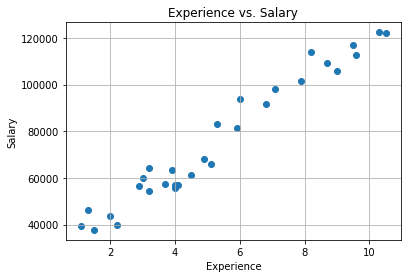

In [6]:
plt.title('Experience vs. Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(df['YearsExperience'], df['Salary'])

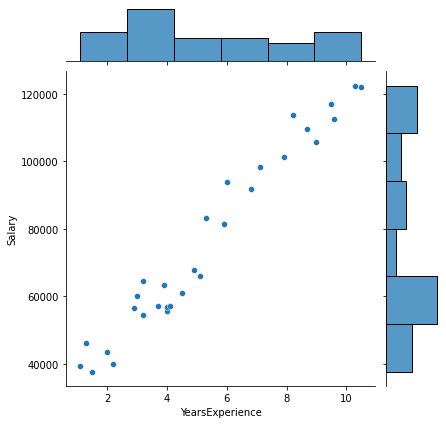

In [7]:
sns.jointplot(x='YearsExperience', y='Salary', data=df)

In [8]:
# input data
x = df['YearsExperience'].values   # Convert the data in arrays

# output data
y = df['Salary']

In [9]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [10]:
x = x.reshape(30,1)   # x.reshape(-1,1)

In [11]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
# Cross - validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, test_size=0.25)

In [13]:
x_train.shape

(22, 1)

In [14]:
x_test.shape

(8, 1)

In [15]:
# import the class
from sklearn.linear_model import LinearRegression

In [16]:
# Create the object
regressor = LinearRegression()

In [17]:
# Train the algorithm
regressor.fit(x_train, y_train)

LinearRegression()

In [18]:
# Predictions on unseen data
y_pred = regressor.predict(x_test)

In [19]:
# Algorithm predicted values
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [20]:
# Compare the actual values and predicted values of salary
result = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

In [21]:
result

,actual,predicted
2,37731,41056.257055
28,122391,123597.709384
13,57081,65443.504334
10,63218,63567.562235
26,116969,116093.940990
24,109431,108590.172597
27,112635,117031.912039
11,55794,64505.533285


In [22]:
# mean absolute error
sum(abs(y_test - y_pred)) / len(y_pred)

3508.5455930660555

In [23]:
# Function
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [24]:
# mean squared error
sum((y_test - y_pred) ** 2) / len(y_pred)

22407940.143340684

In [25]:
# Function
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

22407940.143340684

In [26]:
# RMSE
import math
math.sqrt(mean_squared_error(y_test, y_pred))

4733.70258289858

In [27]:
# Mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred) * 100

5.7545126467796965

In [28]:
# Actual accuracy / r2 score / coefficient of determination
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [29]:
regressor.score(x_test, y_test)

0.9779208335417602

In [30]:
# coefficient / slope
regressor.coef_

array([9379.71049195])

In [31]:
# intercept
regressor.intercept_

26986.691316737248

In [32]:
# Prediction on new data
regressor.predict([[12]])

array([139543.21722009])

In [33]:
12 * 9379.71049195 + 26986.691316737248

139543.21722013725

In [34]:
y_pred = regressor.predict(x)

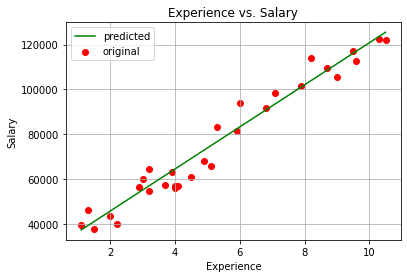

In [35]:
plt.title('Experience vs. Salary')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid()
plt.scatter(x, y, label = 'original', color='r')
plt.plot(x, y_pred, label = 'predicted', color='green')
plt.legend()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

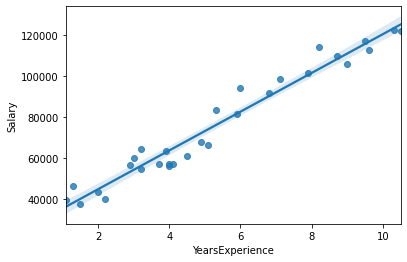

In [36]:
sns.regplot(x='YearsExperience', y='Salary', data=df)

In [37]:
regressor.predict([[10],[11],[16],[20]])

array([120783.7962362 , 130163.50672814, 177062.05918787, 214580.90115566])